# Author:Mehenaz Taherin
### Data Science & Business Analytics Intern
### GRIP - The Sparks Foundation


**Task 6 : Prediction using Decision Tree Algorithm**

**Task objective:** 
*● Create the Decision Tree classifier and visualize it graphically.
● The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

In [3]:
#load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#library for Decision Tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
#library for Visualization
from sklearn.tree import export_graphviz #display the tree and converts decision tree classifier into dot file 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus #pydotplus convert this dot file to png or displayable form on Jupyter.

C:\anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### 1.Read the csv File:

In [4]:
df=pd.read_csv("Iris (1).csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 2. Data preparation

In [21]:
#check for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#drop unnecessary column
df1=df.drop(["Id"],axis=1)

### 3. Data Insights:

In [9]:
df1.describe() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
df1.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [43]:
print(str(column)+' : '+str(df[column].unique()))
print(df1[column].value_counts())

Species : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


### 4. EDA

C:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Species', ylabel='count'>

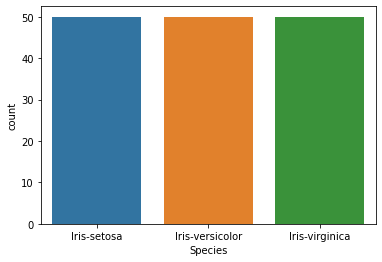

In [45]:
sns.countplot(df1["Species"])

<AxesSubplot:>

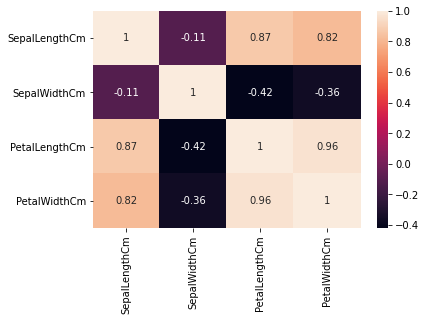

In [46]:
sns.heatmap(df1.corr(),annot=True)

The sepalwidth is negetively corelated with petal width and petal lenght.On the other hand there is a high corelation between petellenght and petel width.

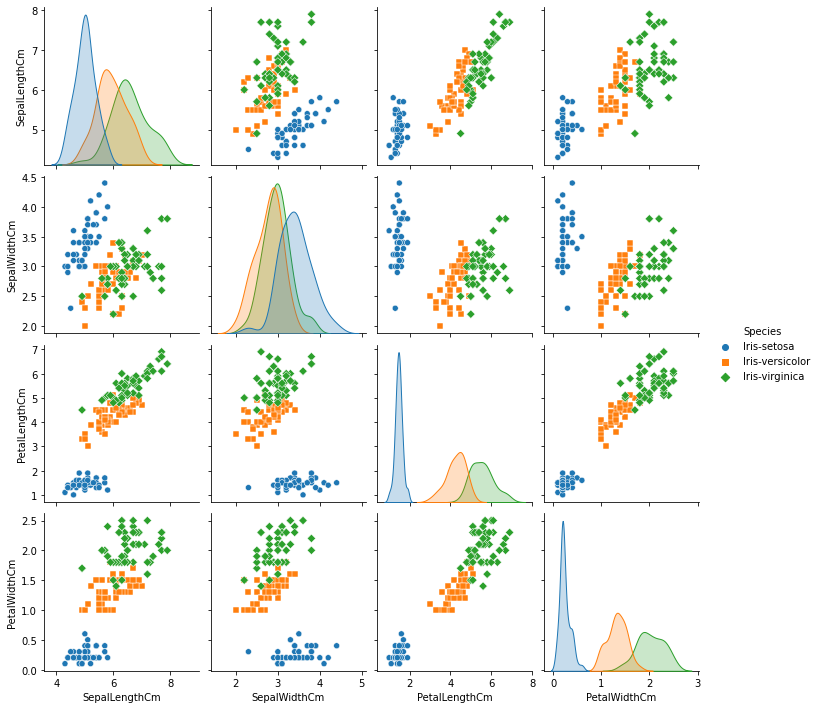

In [24]:
sns.pairplot(df1,hue='Species',markers=["o", "s", "D"])

### 5. get the feature and target values:

In [10]:
 
feature_variable=df1[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
target_variable=df1["Species"].values

In [11]:
feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
target_name=['setosa', 'versicolor', 'virginica']

### 6.split the dataset into 70:30 ratio

In [13]:

X_train, X_test, y_train, y_test=train_test_split(feature_variable,target_variable,train_size=0.7,random_state=1)
#(train_inputs, test_inputs, train_classes, test_classes) 

In [71]:
X_test

array([[5.8, 4. , 1.2, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 3.3, 4.7, 1.6],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 3.8, 1.9, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.4, 3. , 4.5, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5. , 3.5, 1.3, 0.3],
       [7.2, 3.2, 6. , 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [6.1, 2.8, 4.7, 1.2],
       [6.3, 2.5, 5. , 1.9],
       [6.1, 3. , 4.6, 1.4],
       [7.7, 3. , 6.1, 2.3],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 2.8, 5.6, 2.1],
       [5.8, 2

In [84]:
y_test

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

### 7.Model building:

In [14]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
#Predict the response for test dataset
y_pred =DTC.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

### 8.Visualize the graph

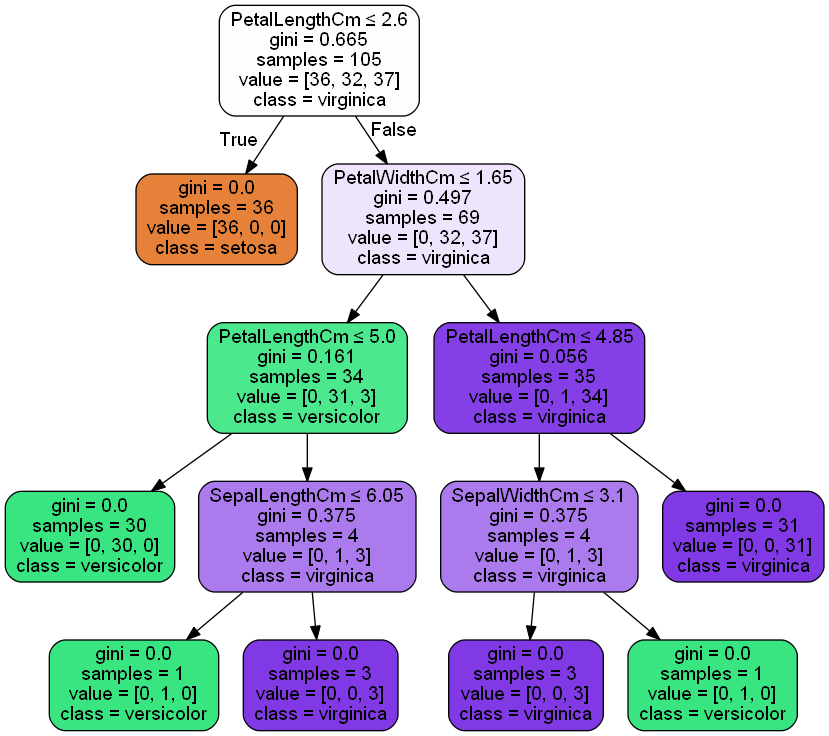

In [18]:

dot_data = StringIO()
export_graphviz(DTC, out_file=dot_data, feature_names=feature_names,class_names=target_name, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 9.Get info from the graph:

In [19]:
# get the depth of the tree.The depth of a tree is the maximum distance between the root and any leaf.
DTC.get_depth()

4

In [20]:
#Return the number of leaves of the decision tree.
DTC.get_n_leaves()

7

In [21]:
DTC.get_params(deep=True)
#Get parameters for this estimator.

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

### Feature Importances:

In [61]:
def plot_feature_importances(DTC, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), DTC.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)

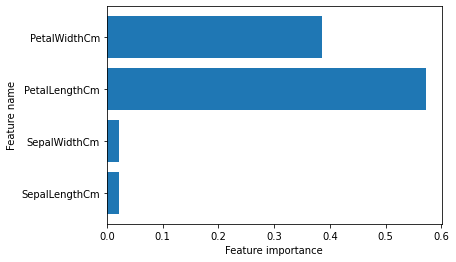

In [62]:
plot_feature_importances(DTC, feature_names)

Feature: 0, Score: 0.02147
Feature: 1, Score: 0.02147
Feature: 2, Score: 0.57196
Feature: 3, Score: 0.38510


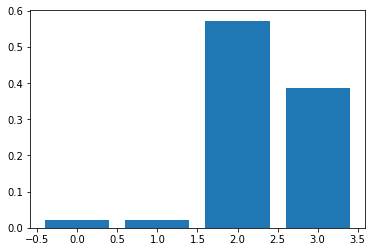

In [53]:
# get importance
importance = DTC.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### The Petel lenght feature has the largest feature importances weight followed by petel width.

### 10. predict for any value:

In [25]:
#The predicted class probability is the fraction of samples of the same class in a leaf.
DTC.predict_proba([[7.7, 3. , 6.1, 2.3]])

array([[0., 0., 1.]])

In [22]:
#Predict class  for X.
DTC.predict([[7.7, 3. , 6.1, 2.3]])

array(['Iris-virginica'], dtype=object)

### 11. Comparison:

In [32]:
# Comparing Actual vs Predicted
df2=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2


,Actual,Predicted
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


### 12.Model Evalution::

In [34]:
from sklearn.metrics import classification_report

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [37]:
print("calssification report\n",classification_report(y_test,y_pred))

calssification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



#### Our model shows 95% accuracy.Hence,any value of  "SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm" will give us accurate target value.  Our objective has achived successfully.

### Thank you